In [0]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_car


In [21]:
df = pd.read_hdf("data/car.h5")
df.shape

(106494, 155)

Dummy Model

In [22]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [23]:
feats = ['car_id']

X = df[feats].values
y = df['price_value'].values 

model = DummyRegressor()
model.fit(X,y)
y_pred = model.predict(X)

mae(y,y_pred)

39465.934630440985

In [24]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [25]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [26]:
df = df[df['price_currency'] != 'EUR']
df.shape

(106290, 155)

In [0]:
SUFFIX_CAT = '__cat'
for feat in df.columns:
  if isinstance(df[feat][0],list):continue

  factorize_values = df[feat].factorize()[0]
  if SUFFIX_CAT in feat:
    df[feat] = factorize_values
  else:
    df[feat + SUFFIX_CAT] = factorize_values 

In [32]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]
cat_feats = [x for x in cat_feats if 'price' not in x]

len(cat_feats)

151

In [0]:
X = df[cat_feats].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model,X,y,cv=3,scoring='neg_mean_absolute_error')

In [34]:
np.mean(scores)

-19566.588937368328

In [36]:
m = DecisionTreeRegressor(max_depth=5)
m.fit(X,y)

imp = PermutationImportance(m,random_state=0).fit(X,y)
eli5.show_weights(imp,feature_names=cat_feats)

Weight,Feature
0.2533 ± 0.0040,param_napęd__cat
0.2008 ± 0.0047,param_faktura-vat__cat
0.1943 ± 0.0088,param_stan__cat
0.1423 ± 0.0086,param_rok-produkcji__cat
0.0629 ± 0.0047,param_moc__cat
0.0424 ± 0.0014,feature_kamera-cofania__cat
0.0412 ± 0.0008,param_skrzynia-biegów__cat
0.0286 ± 0.0037,param_marka-pojazdu__cat
0.0191 ± 0.0022,param_pojemność-skokowa__cat
0.0163 ± 0.0005,feature_bluetooth__cat


In [0]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean,np.median,np.size],feat_sort='mean',top=50,subplots=True):
  return (
df
.groupby(feat_groupby)[feat_agg]
.agg(agg_funcs)
.sort_values(by=feat_sort, ascending=False)
.head(top)
).plot(kind='bar',figsize=(15,5),subplots=subplots)

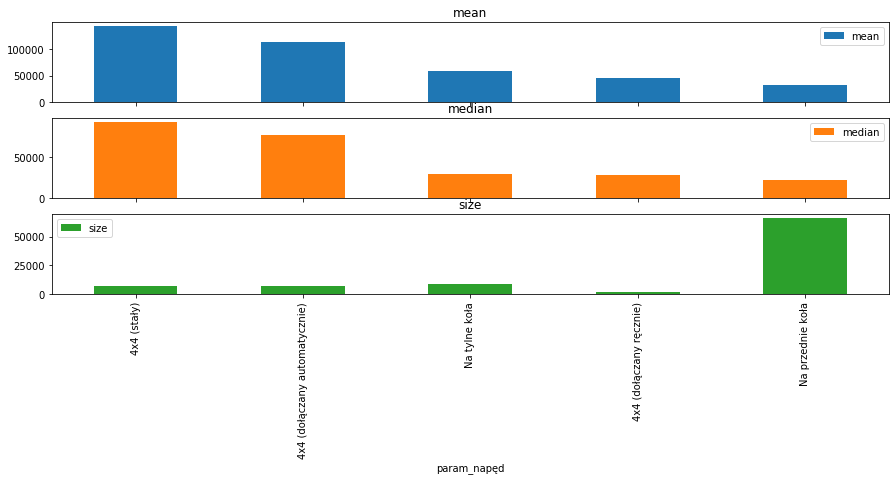

In [41]:
group_and_barplot('param_napęd');

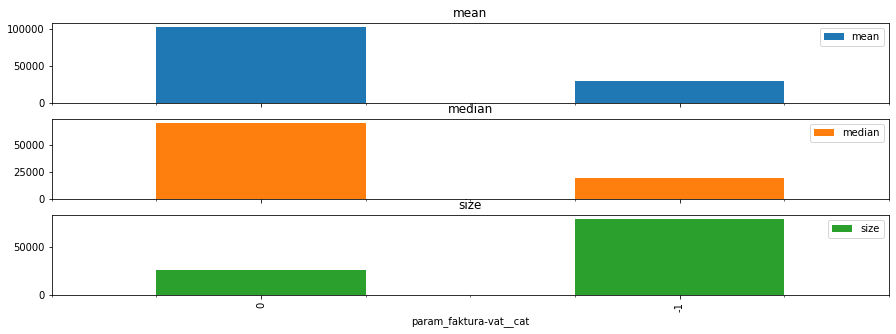

In [43]:
group_and_barplot('param_faktura-vat__cat');

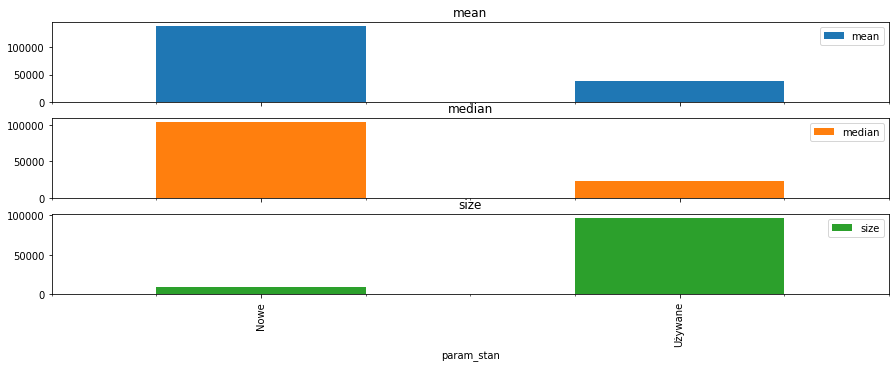

In [46]:
group_and_barplot('param_stan');

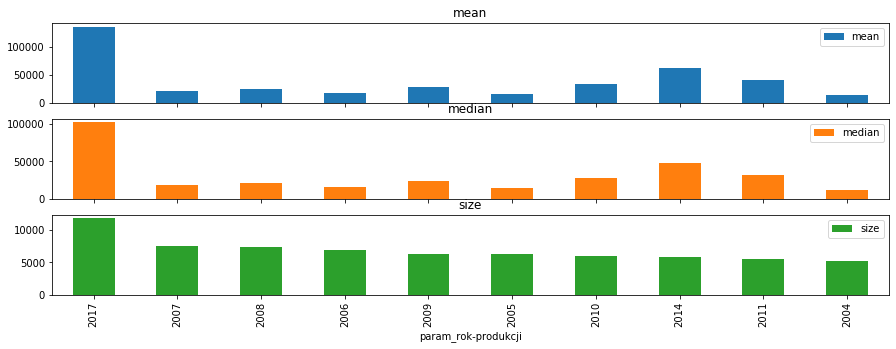

In [51]:
group_and_barplot('param_rok-produkcji',feat_sort='size',top=10);

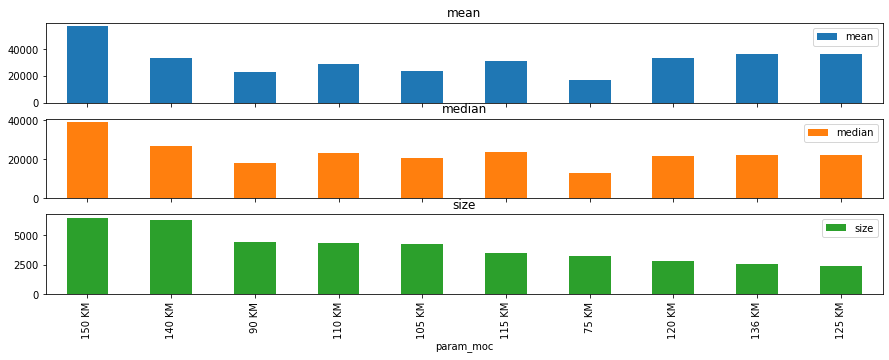

In [54]:
group_and_barplot('param_moc',feat_sort='size',top=10);